An Eigenfaces Session with python
==========
This session aims to demonstrate the use of scikit in python using an eigenfaces exercise. First will construct a class for storing the information of the chamber of representatives. Later we will import the image dataset, compute some descriptive statistics, perform an analysis of principal components, clustering analysis and finally will use a non-linear classifier to assess the gender from just the image of the representative. 

Diputado Class
-----
A diputado has a Name, Surnames, ID, Picture, Gender and Political Affiliation

In [5]:
%matplotlib inline
class Diputado(object):
    def __init__(self,ind,fileRoot="./"):
        self.name=""
        self.surname=""
        self.ind=ind
        self.picfile=""
        self.party=""
        self.gender=""
        self.fileRoot=fileRoot
        self.ext="c.jpg" 
    def setName(self,name):
        self.name=name
    def setSurname(self,surname):
        self.surname=surname
    def setParty(self,party):
        self.party=party
    def setGender(self,gender):
        self.gender=gender
    def getName(self):
        return self.name
    def getSurname(self):
        return self.surname
    def getInd(self):
        return self.ind
    def getPicfile(self):
        return self.fileRoot + str(self.ind) + self.ext
    def getParty(self):
        return self.party
    def getGender(self):
        return self.gender
       

Parlament class
-----
Let's define a very simple Parlament object, where we store the diputados objects. From this class, we have to be able to get information from the parlament.

In [6]:
class Parlament(object):
    def __init__(self):
        self.elements=[]
        self.inds=[]
        self.ndips=0
    def add(self, diputado):
        self.elements.append(diputado)
        self.inds.append(diputado.getInd())
        self.ndips +=1
    def getInds(self):
        return [self.elements[i].getInd() for i in range(self.ndips)]
    def len(self):
        return len(self.elements)
    def __getitem__(self, key):
        if isinstance(key, slice):
            indices = key.indices(self.ndips)
            return [self[ii] for ii in xrange(*key.indices(self.len()))] 
        else:
            return self.elements[key]
    def getName(self,key):
        return self.elements[key].getName()
        

In [7]:
import csv
with open ("C:\\Users\\victoriadx\\Desktop\\Victoria\\01_Studies\\Python\\Final assigment\\Lab Database\\index.csv", encoding="utf8") as csvfile:
    r = csv.reader(csvfile, delimiter=';')
    r.__next__()
    p = Parlament()
    for row in r:
        n = Diputado(int(row[0]),"C:\\Users\\victoriadx\\Desktop\\Victoria\\01_Studies\\Python\\Final assigment\\Lab Database\\db\\")
        n.setName(row[1].strip())
        n.setSurname(row[2].strip())
        n.setGender(row[3].strip())
        n.setParty(row[4].strip())
        p.add(n)


In [8]:
p.len()
p[99].getPicfile()

'C:\\Users\\victoriadx\\Desktop\\Victoria\\01_Studies\\Python\\Final assigment\\Lab Database\\db\\91c.jpg'

Let's create a dataset of the analysis.


'Joan|Tardà i Coma|H'

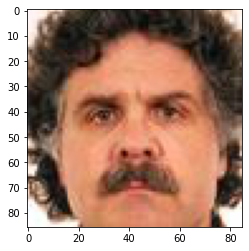

In [9]:
from scipy import ndimage,misc
import numpy as np
import matplotlib.pyplot as pl
idip = 129
I = pl.imread(p[idip].getPicfile())
pl.imshow(I)
np.shape(I)
'|'.join([p[idip].getName(), p[idip].getSurname(), p[idip].getGender()])

(86, 85)

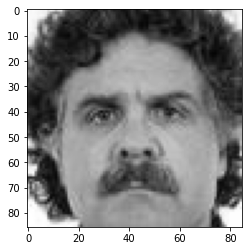

In [10]:
I = pl.imread(p[idip].getPicfile()).mean(axis=2)
img=pl.imshow(I)
img.set_cmap('gray')
Is=np.shape(I)
Is

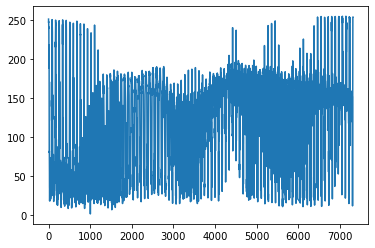

In [11]:
Iv = np.reshape(I,np.prod(Is))
pl.plot(Iv)

Let's stack all images to an array and create a couple of dependent variables.

In [12]:
X=np.array([ pl.imread(d.getPicfile()).mean(axis=2).ravel()
             for d in p])
np.shape(X)
Yg=np.array([ d.getGender() for d in p])
Yp=np.array([ d.getParty() for d in p])
Yp[0:5],Yg[0:5],np.shape(X)

(array(['GS', 'GS', 'GC-CiU', 'GP', 'GP'], dtype='<U10'),
 array(['H', 'M', 'H', 'H', 'H'], dtype='<U1'),
 (348, 7310))

Q1.1 Which is the propotion of male/females?
=

In [13]:
unique, counts = np.unique(Yg, return_counts=True)
dict(zip(unique, counts * 100 / len(Yg)))

{'H': 64.08045977011494, 'M': 35.91954022988506}

Q1.2 Which is the most common male name? 
=

In [14]:
X=np.array([ pl.imread(d.getPicfile()).mean(axis=2).ravel()
             for d in p])
np.shape(X)
Yn=np.array([ d.getName() for d in p])
Yn[0:5]

array(['Manuel', 'Carme', 'Jordi', 'Gabriel', 'Ignacio'], dtype='<U24')

In [15]:
from collections import Counter
 
def most_frequent(Yn):
    occurence_count = Counter(Yn)
    return occurence_count.most_common(1)[0][0]
   
print(most_frequent(Yn))

José


In [16]:
import pandas as pd

matrix_aux = np.vstack([Yn,Yg,Yp])
matrix     = np.transpose(matrix_aux)
df_n = pd.DataFrame(matrix, columns=['Name', 'Sex','Party'])
df_n

,Name,Sex,Party
0,Manuel,H,GS
1,Carme,M,GS
2,Jordi,H,GC-CiU
3,Gabriel,H,GP
4,Ignacio,H,GP
...,...,...,...
343,Luis de,H,GP
344,José Luis del,H,GP
345,María Eugenia,M,GP
346,Verónica,M,GP


In [17]:
df_n['Name'].loc[df_n['Sex'] == 'H'].value_counts().idxmax()

'José'

Q1.3 which is the most common female name? 
=

In [18]:
df_n['Name'].loc[df_n['Sex'] == 'M'].value_counts().idxmax()

'Carmen'

Q1.4 which is the size of the dataset? 
=

In [19]:
X.shape

(348, 7310)

Q1.5 How many individuals we have for each political party?
=

In [20]:
def unique(Yp):
    x = np.array(Yp)
    print(np.unique(x))
unique(Yp)

['GC-CiU' 'GCC' 'GER-ERC' 'GIV-IU-ICV' 'GMx' 'GP' 'GS' 'GV']


In [21]:
df_n['Party'].value_counts()

GS            164
GP            146
GC-CiU         10
GER-ERC         8
GV              7
GIV-IU-ICV      5
GMx             5
GCC             3
Name: Party, dtype: int64

<IPython.core.display.Javascript object>


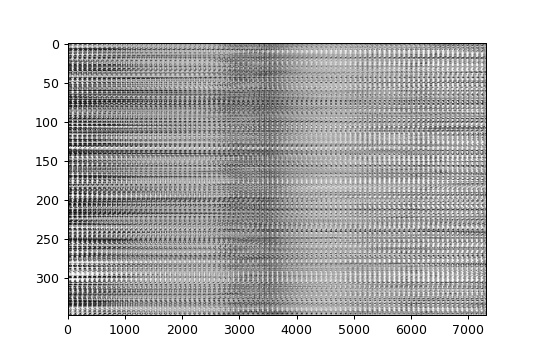

In [22]:
%matplotlib notebook 
pl.figure()
pl.imshow(X,aspect='auto')
pl.set_cmap('gray')


In [23]:
X.shape

(348, 7310)

# Q2 The mean representative and plot the image corresponding to the mean representative 


In [24]:
mX = X.mean(axis = 0)
mX.shape

(7310,)

In [25]:
mX.reshape(Is).shape

(86, 85)

<IPython.core.display.Javascript object>


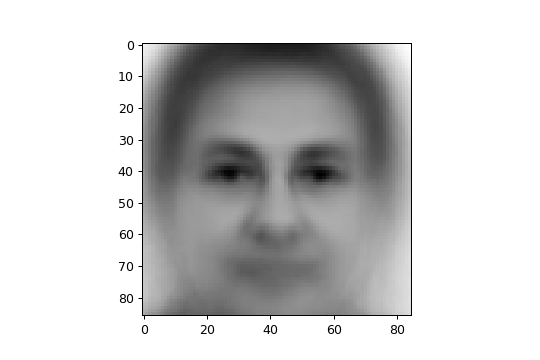

In [26]:
import pylab as pl
pl.figure()
pl.imshow( mX.reshape(Is) )

Q3 The standard deviation and plot the corresponding image
=

<IPython.core.display.Javascript object>


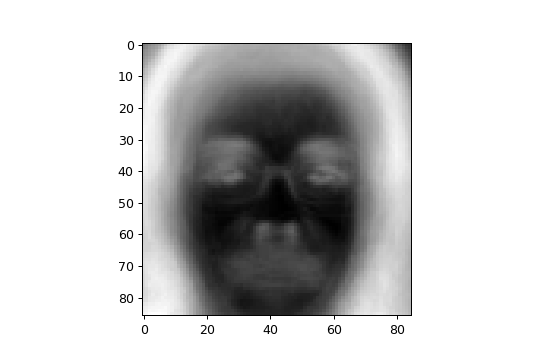

In [27]:
sX = X.std(axis=0)
sX.shape
pl.figure()
pl.imshow(sX.reshape(Is))

Q4 Run a k-means clustering and split the representatives' data into 10 groups. 
==
Plot the full set of images for two groups of your choice.

In [28]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
pca = PCA(5)
 
#Transform the data
df = pca.fit_transform(X)
 
df.shape

(348, 5)

In [132]:
df

array([[-2467.99959406,  1223.36420177,  -170.26555978,  -264.24187612,
          337.5681881 ],
       [ 3719.51852313, -1398.16618132,  1230.73658785,   864.93873643,
         -737.77063988],
       [-2257.45840592,  -524.97436344,  1605.29249818,  -918.70048727,
          316.75985822],
       ...,
       [ 2569.36489937, -2875.04480848,    47.91395647,  1053.20046572,
          375.93574613],
       [ 3393.2486274 , -2069.05655658,  2302.8200388 ,  1414.37802178,
         -314.36495993],
       [ -526.40249174,  -506.8332543 ,  -984.17741087, -1574.89134992,
          118.98852011]])

In [133]:
dfx = pd.DataFrame(df)
dfx

,0,1,2,3,4
0,-2467.999594,1223.364202,-170.265560,-264.241876,337.568188
1,3719.518523,-1398.166181,1230.736588,864.938736,-737.770640
2,-2257.458406,-524.974363,1605.292498,-918.700487,316.759858
3,551.537788,-1758.460625,497.108560,-1355.163497,-83.101720
4,-888.454459,-1842.536767,-297.625932,-1600.431462,479.540043
...,...,...,...,...,...
343,187.761967,-64.088680,1093.389756,449.384915,-694.136192
344,-975.615269,-1033.276011,460.665615,-1442.047831,-865.523309
345,2569.364899,-2875.044808,47.913956,1053.200466,375.935746
346,3393.248627,-2069.056557,2302.820039,1414.378022,-314.364960


In [134]:
from sklearn import cluster 
k_means = cluster.KMeans(n_clusters = 10) 
k_means.fit(dfx)

KMeans(n_clusters=10)

In [135]:
 
#predict the labels of clusters.
label = k_means.fit_predict(dfx)
label
 

array([5, 1, 2, 9, 9, 9, 3, 7, 3, 0, 7, 2, 7, 0, 2, 7, 6, 5, 1, 1, 9, 5,
       8, 8, 7, 2, 8, 0, 6, 7, 4, 0, 0, 6, 6, 7, 9, 0, 8, 7, 8, 5, 9, 2,
       4, 0, 0, 0, 0, 5, 1, 0, 7, 6, 0, 0, 9, 8, 5, 0, 4, 1, 0, 6, 0, 3,
       3, 5, 8, 8, 3, 9, 6, 1, 1, 1, 7, 4, 1, 8, 7, 3, 5, 1, 5, 7, 5, 0,
       9, 3, 3, 9, 0, 4, 2, 7, 1, 8, 9, 5, 4, 4, 2, 5, 6, 3, 2, 0, 5, 3,
       5, 4, 9, 3, 6, 8, 2, 9, 6, 5, 9, 0, 2, 8, 6, 7, 8, 2, 6, 3, 0, 4,
       8, 2, 2, 0, 5, 4, 8, 4, 6, 3, 4, 7, 6, 2, 0, 9, 5, 2, 7, 8, 0, 9,
       7, 2, 4, 1, 8, 0, 8, 6, 9, 8, 8, 9, 4, 9, 0, 7, 3, 3, 0, 0, 5, 2,
       0, 2, 0, 9, 8, 8, 5, 9, 7, 6, 7, 8, 8, 0, 7, 1, 0, 1, 1, 2, 0, 0,
       3, 1, 6, 8, 4, 6, 7, 5, 1, 6, 5, 5, 7, 2, 4, 4, 6, 5, 0, 6, 1, 8,
       2, 6, 4, 7, 5, 9, 4, 7, 8, 9, 7, 5, 6, 5, 0, 2, 2, 5, 4, 9, 4, 1,
       0, 0, 2, 1, 7, 5, 9, 4, 8, 6, 6, 5, 7, 1, 7, 8, 7, 2, 6, 9, 6, 4,
       5, 7, 2, 5, 2, 4, 0, 4, 1, 5, 0, 1, 5, 0, 0, 2, 2, 9, 3, 5, 8, 6,
       9, 2, 6, 2, 3, 2, 5, 2, 2, 2, 2, 9, 0, 0, 5,

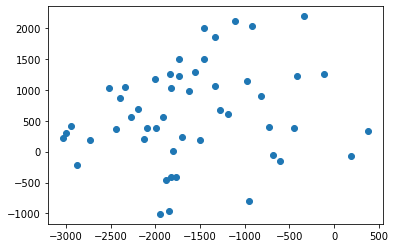

In [137]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.figure()
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

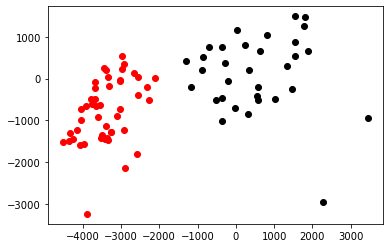

In [138]:
#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.figure()
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

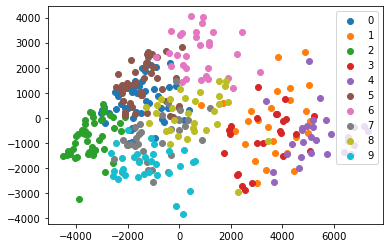

In [139]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
plt.figure()
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [140]:
k_means.cluster_centers_.shape

(10, 5)

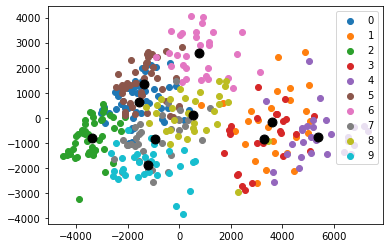

In [141]:
#Getting the Centroids
centroids = k_means.cluster_centers_
u_labels = np.unique(label)
#plotting the results:
plt.figure()
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


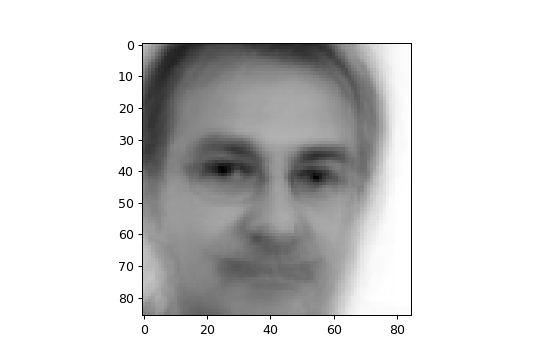

In [36]:
pl.figure()
pl.imshow(  k_means.cluster_centers_[6,:].reshape(Is)  )

<IPython.core.display.Javascript object>


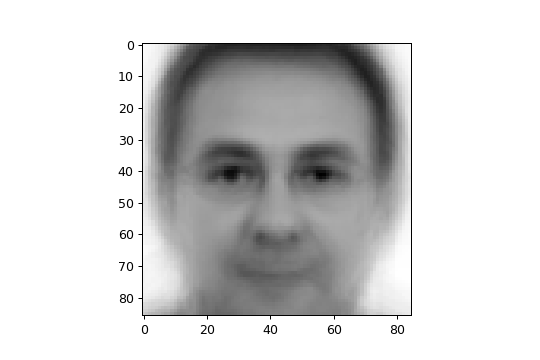

In [37]:
pl.figure()
pl.imshow(  k_means.cluster_centers_[1,:].reshape(Is)  )

In [38]:
print(unique(k_means.labels_))

[0 1 2 3 4 5 6 7 8 9]
None


In [39]:
import math 
def plotg(g):
    indg = np.where(k_means.labels_ == g)
    nx = int(math.sqrt(np.shape(indg)[1]))+1
    ny = nx+1
    f = pl.figure()
    for e,i in enumerate(indg[0]):
        f.add_subplot(ny,nx,e+1)
        pl.imshow(X[i,:].reshape(Is), cmap=pl.cm.gray)
        pl.axis('off')

<IPython.core.display.Javascript object>


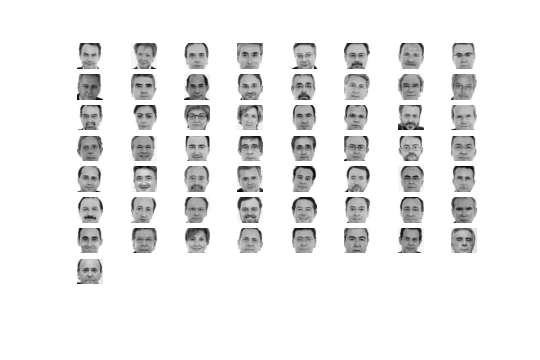

In [40]:
plotg(1)

<IPython.core.display.Javascript object>


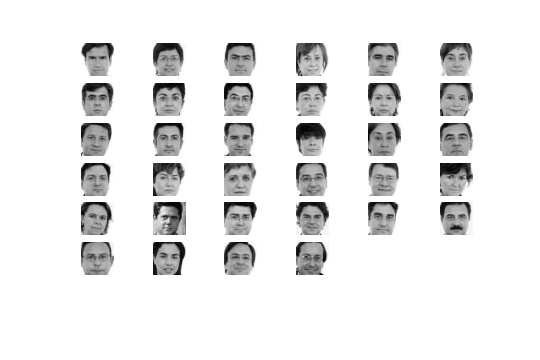

In [41]:
plotg(7)

Q6 Fit a PCA model of the dataset
=

In [42]:
clYg = Yg[k_means.labels_]

In [43]:
from sklearn import metrics
metrics.confusion_matrix(Yg,clYg)

array([[ 97, 126],
       [ 97,  28]], dtype=int64)

In [44]:
from sklearn.decomposition import PCA 
from sklearn import preprocessing 

sX = preprocessing.scale(X)


In [45]:
mod = PCA( n_components= 10)
mod.fit(sX)

PCA(n_components=10)

In [46]:
mod.explained_variance_ratio_

array([0.2136283 , 0.08746378, 0.07299065, 0.0517424 , 0.04674383,
       0.03812846, 0.03018535, 0.01985137, 0.01821028, 0.01590365])

In [47]:
T = mod.transform(sX)

In [48]:
T.shape

(348, 10)

Q7 Build a 2D score plot with the projections of the representatives onto the PCA plane. 
==
Generate two plots, one marking the gender label, a second one marking the political afiliation label
==

<IPython.core.display.Javascript object>


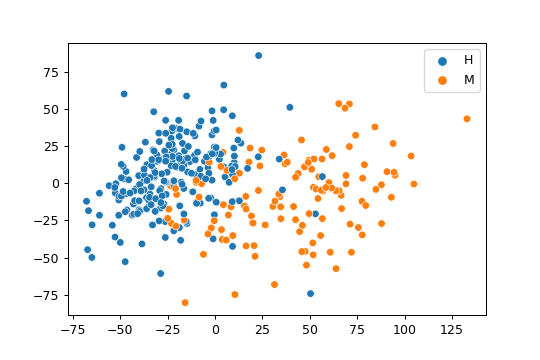

<AxesSubplot:>

In [49]:
#gender plot
pl.figure()
import seaborn as sns 
sns.scatterplot(x=T[:,0],y=T[:,1], hue=Yg)

<IPython.core.display.Javascript object>


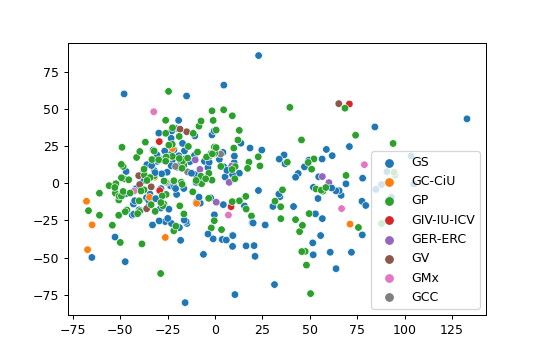

<AxesSubplot:>

In [50]:
#politacal affilation plot
pl.figure()
import seaborn as sns 
sns.scatterplot(x=T[:,0],y=T[:,1], hue=Yp)

Q8 Plot the first three eigenvectors (principal components, PCs) projection vectors
==

In [51]:
mod.components_.shape

(10, 7310)

In [52]:
mod.components_.reshape( (10, Is[0], Is[1]) ).shape

(10, 86, 85)

In [53]:
e = mod.components_.reshape( (10, Is[0], Is[1]) )

<IPython.core.display.Javascript object>


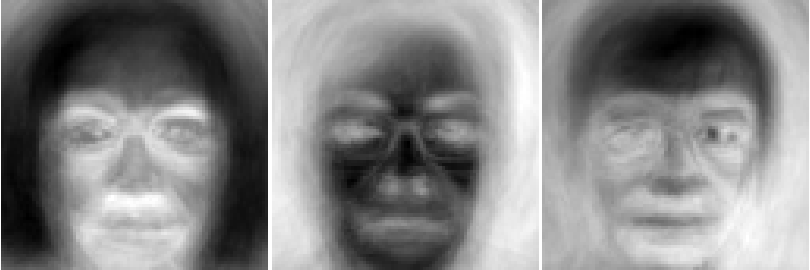

In [54]:
pl.figure(figsize=(9,3))
pl.subplot(131)
pl.imshow(e[0])
pl.axis('off')

pl.subplot(132)
pl.imshow(e[1])
pl.axis('off')


pl.subplot(133)
pl.imshow(e[2])
pl.axis('off')

pl.subplots_adjust(wspace=0.01, hspace=0.01,
                  top=1, bottom=0, left=0, right=1)
pl.show()

Q9 Plot the amount of variance explained by each PCs
=

In [56]:
df

array([[-2467.99959406,  1223.36420177,  -170.26555978,  -264.24187612,
          337.5681881 ],
       [ 3719.51852313, -1398.16618132,  1230.73658785,   864.93873643,
         -737.77063988],
       [-2257.45840592,  -524.97436344,  1605.29249818,  -918.70048727,
          316.75985822],
       ...,
       [ 2569.36489937, -2875.04480848,    47.91395647,  1053.20046572,
          375.93574613],
       [ 3393.2486274 , -2069.05655658,  2302.8200388 ,  1414.37802178,
         -314.36495993],
       [ -526.40249174,  -506.8332543 ,  -984.17741087, -1574.89134992,
          118.98852011]])

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

df1 = pd.DataFrame(df)
df1

,0,1,2,3,4
0,-2467.999594,1223.364202,-170.265560,-264.241876,337.568188
1,3719.518523,-1398.166181,1230.736588,864.938736,-737.770640
2,-2257.458406,-524.974363,1605.292498,-918.700487,316.759858
3,551.537788,-1758.460625,497.108560,-1355.163497,-83.101720
4,-888.454459,-1842.536767,-297.625932,-1600.431462,479.540043
...,...,...,...,...,...
343,187.761967,-64.088680,1093.389756,449.384915,-694.136192
344,-975.615269,-1033.276011,460.665615,-1442.047831,-865.523309
345,2569.364899,-2875.044808,47.913956,1053.200466,375.935746
346,3393.248627,-2069.056557,2302.820039,1414.378022,-314.364960


In [165]:
df_st =  StandardScaler().fit_transform(df1)  
pd.DataFrame(df_st, columns=df1.columns).head(2)

,0,1,2,3,4
0,-0.908465,0.823436,-0.122289,-0.203466,0.395418
1,1.369146,-0.941094,0.883944,0.666003,-0.864204


In [168]:
pca_out = PCA().fit(df_st)
pca_out

PCA()

In [169]:
# get the component variance
# Proportion of Variance 

pca_out.explained_variance_ratio_

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [160]:
# Cumulative proportion of variance 
np.cumsum(pca_out.explained_variance_ratio_)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [161]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df
# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. Except A and B, all other variables have 
# positive projection on first PC.

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
0,0.000000,0.000000,0.000000,0.000000,1.0
1,-0.943639,0.016607,-0.102157,-0.314378,0.0
2,0.326539,-0.000904,-0.436529,-0.838340,0.0
3,-0.051437,0.010021,-0.893813,0.445368,0.0
4,0.016484,0.999811,0.010261,0.000000,0.0


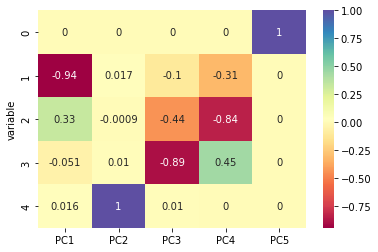

In [162]:
# get correlation matrix plot for loadings
pl.figure()
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [163]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([1.00288184, 1.00288184, 1.00288184, 1.00288184, 1.00288184])

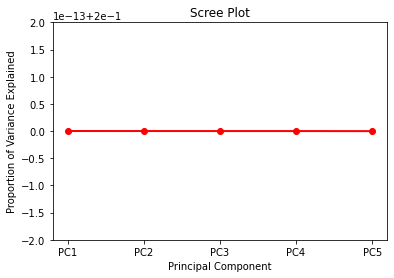

In [164]:
pl.figure()
plt.plot(pc_list, pca_out.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

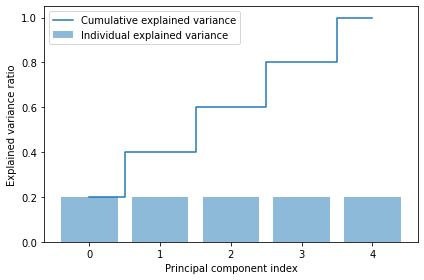

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df1)
X_train_std = sc.transform(df1)
#
# Import eigh method for calculating eigenvalues and eigenvectirs
#
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(X_train_std, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
pl.figure()
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()